In [1]:
import pandas as pd
import numpy as np
import os
import typing
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
url= 'gdrive/Shareddrives/CPSC 4176 Project Spring 2023/UAV Data/UAV_4_Data_down.xlsx'


In [3]:
data=pd.read_excel(url)

In [4]:
data['VehicleID']

0             7
1             7
2             7
3             7
4             7
          ...  
472236    15133
472237    15133
472238    15133
472239    15133
472240    15133
Name: VehicleID, Length: 472241, dtype: int64

In [5]:
df = pd.DataFrame(data)

In [6]:
#see all the data in xlsx file
df

,VehicleID,LaneID,Time(s),x-axis position(m),Distance from upper Lane line(m),Distance from lower lane line(m),Speed(m/s),Acceleration(m/s^2),VehicleLength(meter),VehicleWidth(meter)
0,7,1,0.03333,292.885000,1.516244,2.058017,17.160722,1.475500e-01,5.101913,2.058609
1,7,1,0.06666,293.456967,1.523727,2.049199,17.165635,1.412713e-01,5.101913,2.058609
2,7,1,0.09999,294.029097,1.531513,2.040078,17.170339,1.863339e-01,5.101913,2.058609
3,7,1,0.13332,294.601385,1.539330,2.030925,17.176544,2.036830e-01,5.101913,2.058609
4,7,1,0.16665,295.173879,1.547176,2.021743,17.183327,1.955357e-01,5.101913,2.058609
...,...,...,...,...,...,...,...,...,...,...
472236,15133,1,1184.58153,14.082747,0.788027,2.480324,12.852532,0.000000e+00,4.901486,1.992432
472237,15133,1,1184.61486,14.511122,0.785365,2.486057,12.852532,0.000000e+00,4.901486,1.992432
472238,15133,1,1184.64819,14.939497,0.782704,2.491789,12.852532,0.000000e+00,4.901486,1.992432
472239,15133,1,1184.68152,15.367872,0.780042,2.497522,12.852532,-2.633009e-09,4.901486,1.992432


In [7]:
#Need to get multiple rows with same vehicle id and whole information

print(type(len(df['VehicleID'])))
print(len(df['VehicleID']))
x=0
for i in range(len(df['VehicleID'])):
  if df['VehicleID'][i]==7:
    x+=1


print("The number for the vehicle: "+ str(x))  

<class 'int'>
472241
The number for the vehicle: 107


In [8]:
#Vincent got it
vehicle_7= df.loc[df['VehicleID']==7]
vehicle_7=vehicle_7.drop(columns=['VehicleLength(meter)','VehicleWidth(meter)',"Distance from upper Lane line(m)","Distance from lower lane line(m)"], axis=1)
vehicle_7


,VehicleID,LaneID,Time(s),x-axis position(m),Speed(m/s),Acceleration(m/s^2)
0,7,1,0.03333,292.885000,17.160722,0.147550
1,7,1,0.06666,293.456967,17.165635,0.141271
2,7,1,0.09999,294.029097,17.170339,0.186334
3,7,1,0.13332,294.601385,17.176544,0.203683
4,7,1,0.16665,295.173879,17.183327,0.195536
...,...,...,...,...,...,...
102,7,1,3.43299,352.505062,17.936791,0.134718
103,7,1,3.46632,353.102895,17.941277,0.215080
104,7,1,3.49965,353.700878,17.948439,0.173093
105,7,1,3.53298,354.299099,17.954203,0.180459


In [9]:
vehicle_15133= df.loc[df['VehicleID']==15133]
vehicle_15133=vehicle_15133.drop(columns=['VehicleLength(meter)','VehicleWidth(meter)',"Distance from upper Lane line(m)","Distance from lower lane line(m)"], axis=1)
vehicle_15133.head()

#This speeed is actually from this x-axis position/time

,VehicleID,LaneID,Time(s),x-axis position(m),Speed(m/s),Acceleration(m/s^2)
472210,15133,1,1183.71495,2.945000,12.852532,-3.734083e-13
472211,15133,1,1183.74828,3.373375,12.852532,0.000000e+00
472212,15133,1,1183.78161,3.801750,12.852532,0.000000e+00
472213,15133,1,1183.81494,4.230125,12.852532,0.000000e+00
472214,15133,1,1183.84827,4.658500,12.852532,0.000000e+00


<AxesSubplot:title={'center':'time acceleration'}, xlabel='Time(s)'>

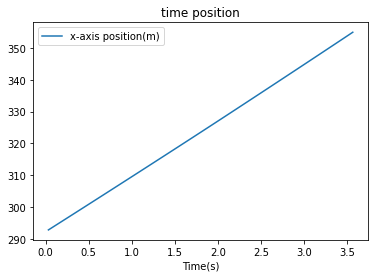

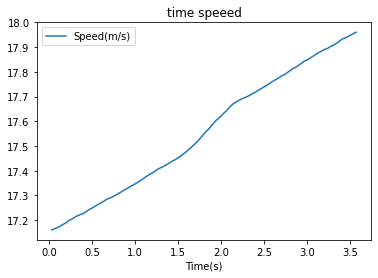

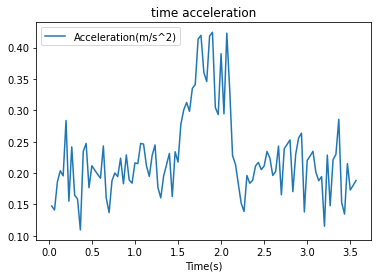

In [10]:
vehicle_7.plot(x='Time(s)', y='x-axis position(m)',title= 'time position')
vehicle_7.plot(x='Time(s)', y='Speed(m/s)',title= 'time speeed')
vehicle_7.plot(x='Time(s)', y='Acceleration(m/s^2)',title= 'time acceleration')

<AxesSubplot:title={'center':'time acceleration'}, xlabel='Time(s)'>

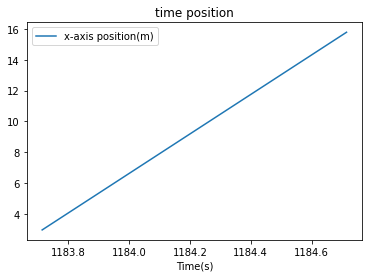

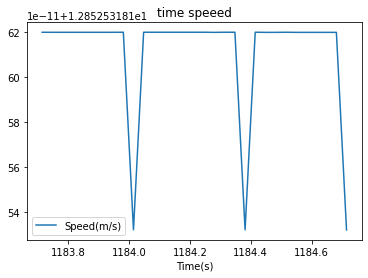

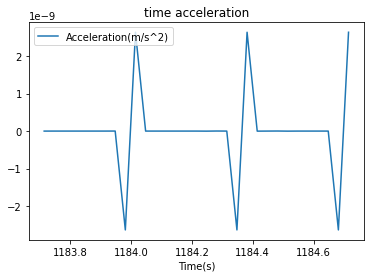

In [11]:
vehicle_15133.plot(x='Time(s)', y='x-axis position(m)',title= 'time position')
vehicle_15133.plot(x='Time(s)', y='Speed(m/s)',title= 'time speeed')
vehicle_15133.plot(x='Time(s)', y='Acceleration(m/s^2)',title= 'time acceleration')

In [12]:
#Way to normalize a data
#import numpy as np

def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [15]:
#How to put this normalized data into the new excel file
print(NormalizeData(vehicle_7["Speed(m/s)"]))


0      0.000000
1      0.006146
2      0.012030
3      0.019791
4      0.028275
         ...   
102    0.970704
103    0.976316
104    0.985274
105    0.992484
106    1.000000
Name: Speed(m/s), Length: 107, dtype: float64


In [14]:

print(vehicle_7['Speed(m/s)'].max())
print(vehicle_7['Speed(m/s)'].min())
vehicle_7

17.960212763051665
17.160721511071298


,VehicleID,LaneID,Time(s),x-axis position(m),Speed(m/s),Acceleration(m/s^2)
0,7,1,0.03333,292.885000,17.160722,0.147550
1,7,1,0.06666,293.456967,17.165635,0.141271
2,7,1,0.09999,294.029097,17.170339,0.186334
3,7,1,0.13332,294.601385,17.176544,0.203683
4,7,1,0.16665,295.173879,17.183327,0.195536
...,...,...,...,...,...,...
102,7,1,3.43299,352.505062,17.936791,0.134718
103,7,1,3.46632,353.102895,17.941277,0.215080
104,7,1,3.49965,353.700878,17.948439,0.173093
105,7,1,3.53298,354.299099,17.954203,0.180459
